# **NAMA    : PUTRI WULANDARI**

# **NIM    : 09011181722073**

## Sistem Peringatan Dini untuk Deteksi Kebakaran pada Kebocoran Gas Menggunakan Fuzzy Logic Control 

Smart home adalah sistem yang dirancang untuk meringankan aktifitas penghuni rumah dalam mengamankan rumah dari bahaya kebocoran gas LPG (Liquefied Petroleum Gas). LPG merupakan bahan bakar yang terdiri dari senyawa hidrokarbon atau dikenal sebagai butana (C4H10), propane (C3H8) dan isobutana (campuran butana dan propane) yang digunakan sebagai bahan bakar pengganti minyak tanah. Sifat dari LPG adalah mudah menguap diatas suhu 24℃, mudah terbakar dan mempunyai bau yang tidak sedap.

Peringatan dini diperlukan untuk menanggulangi masalah kebocoran gas LPG yang dapat menyebabkan kebakaran. Untuk itu perlu dikembangkan suatu sistem kendali yang mampu mengatur sistem secara otomatis untuk mengidentifikasi adanya kebocoran gas LPG. Penggunanan logika fuzzy dalam sistem kendali sudah bukan merupakan hal yang baru, sudah banyak aplikasi sistem kendali yang menggunakan teori logika fuzzy.

Sistem ini dirancang dengan menggunakan **input** sensor MQ5 untuk mengidentifikasi adanya **gas LPG** dan juga sensor LM35 untuk mengidetifikasi **suhu**. Dari kedua variabel tersebut, akan dihasilkan sebuah **output** yaitu nilai yang digunakan  untuk menjalakan **fan**.Pada sistem ini digunakan logika fuzzy, dengan **Metode Mamdani** untuk menentukan kecepatan dari fan yang berfungsi.

Dari latar belakang tersebut, setiap keadaan dari varibel input dan output akan dijabarkan dalam linguistik sebagai berikut:

**INPUT**

**Konsentrasi Gas**

    Rendah : 1-50%
    Sedang : 25-75%
    Tinggi : 50-100%
    
**Tingkat Panas Ruangan**

    Rendah : 30-50 derajat Celcius
    Sedang : 40-60 derajat Celcius
    Tinggi : 50-70 derajat Celcius 
    
    
    
**OUTPUT**

**Putaran Fan**

    Lambat  : 1-50
    Sedang  : 25-75
    Cepat   : 75-100 

Secara umum blok diagram sistem peringatan dini pada yang dibuat dapat dilihat pada Gambar berikut: 

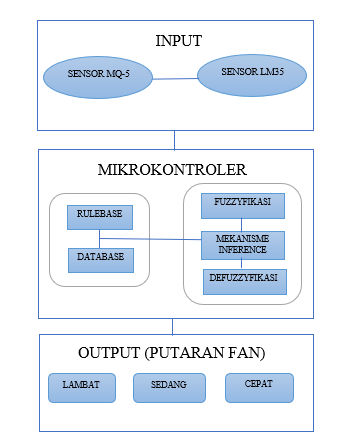

In [1]:
from IPython.display import Image
PATH = "C:/Users/Putri/Documents/PRAKTIKUM AI/uts fuzzy logic/putri fuzzy/"
Image(filename = PATH + "1. diagram sistem.png")

**TAHAPAN PADA FUZZY LOGIC**
 >1. Fuzzyfikasi
 >2. Rule Base
 >3. Mekanisme Inferensi
 >4. Defuzzyfikasi
<space>Selanjutnya tahapan fuzzy logic tersebut akan diterjemahkan menggunakan program Python

**1. Mengimport Library yang Akan Digunakan**

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from IPython.display import Image

Ada beberapa library yang digunakan yaitu _numpy_, _matplotlib.pyplot_dan _skfuzzy_. Library **_numpy_** yang berguna untuk mengolah data yang bersifat numerical. Libray **_matplotlib.pyplot_** berguna untuk membuat dan menampilkan grafik. Library **_skfuzzy_** digunakan sebagai penyedia modul fuzzy logic. Fungsi **_control_** juga diambil dari library _skfuzzy_ yang berguna untuk menyediakan API tingkat tinggi untuk desain sistem fuzzy. **_Image_** digunakan untuk memasukkan gambar ke Python.

**FUZZYFIKASI**

**2. Menentukan Variabel dan Semesta Pembicaraan**

Setiap variabel input dan output akan ditentukan batas nilai dari masing-masing variabel (semesta pembicaraan). Hal ini dikarenakan setiap variabel yang akan digunakan dalam proses fuzzy pastinya memiliki nilai numerik, dan memiliki batas awal dan batas akhir.

**Input Konsentrasi Gas**
<space> Semesta pembicaraan dari variabel input konsentrasi gas diambil dari range 1 hingga 100

In [7]:
Konsentrasi_gas = ctrl.Antecedent(np.arange(1, 101, 1), 'Konsentrasi Gas')

**Input Panas Ruangan**
<space> Semesta pembicaraan dari variabel input suhu ruangan diambil dari range 30 derajat Celcius hingga 100 derajat Celcius

In [8]:
Panas_ruangan = ctrl.Antecedent(np.arange(30, 71, 1), 'Tingkat Panas Ruangan')

**Output Kecepatan Putaran Fan**
<space> Semesta pembicaraan dari variabel output kecepatan putaran fan adalah 1 hingga 100

In [9]:
Putaran_fan = ctrl.Consequent(np.arange(1, 101, 1), 'Putaran Fan')

**_ctrl.Antecedent_** digunakan sebagai input untuk sistem kendali pada Fuzzy. Sedangakan **_ctrl.Consequent_** digunakan sebagai output untuk sistem kendali pada Fuzzy. Adapun angaka yang terdapat di dalam kurung merupakan batas-batas pada masing-masing variabel dengan format susunan **(batas awal, batas akhir, kelipatan)** kemudian yang di dalam tanda petik merupakan labelnya.

Adapun fungsi untuk membuat plot terpisah adalah pada masing-masing variabel adalah

In [10]:
konsentrasi_gas1 = np.arange(1, 101, 1)
panas_ruangan1 = np.arange(29, 71, 1)
putaran_fan1 = np.arange(1, 101, 1)

Fungsi tersebut nantinya akan digunakan pada saat penampilan plot masing-masing variabel, baik input ataupun output secara terpisah.

**3. Menentukan Himpunan Fuzzy**

Setelah menentukan semesta pembicaraan masing-masing variabel dalam bentuk numerik, selanjutnya adalah membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal. Berikut dibentuk dalam tabel:

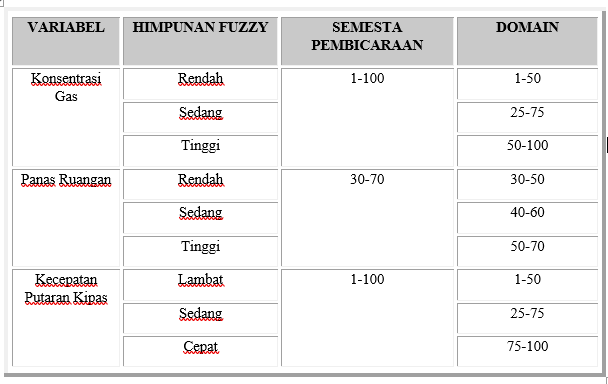

In [15]:
PATH = "C:/Users/Putri/Documents/PRAKTIKUM AI/uts fuzzy logic/putri fuzzy/"
Image(filename = PATH + "2.tabel semesta pembicaraan.png")

**4. Menentukan Fungsi Keanggotaan**

Sebuah himpunan fuzzy akan didefinisikan dengan cara memetakan masukan crisp dari domain ke dalam derajat keanggotaan. Pada sistem kali ini digunakan dua jenis fungsi keanggotaan, yaitu fungsi keanggotaan segitiga dan fungsi keanggotaan trapesium. 

Adapun kurva fungsi keanggotaan segitiga dapat ditunjukkan pada gambar berikut:

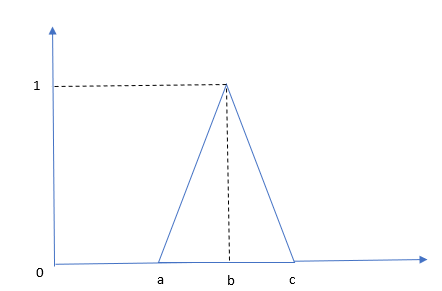

In [18]:
Image(filename = PATH + "grafik segitiga.png")

Sedangkan rumus repersentasinya adalah sebagai berikut!

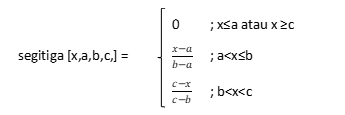

In [20]:
Image(filename = PATH + "rumus segitiga.png")

**Keterangan**

    a: nilai domain terkecil yang memiliki nilai derajat keanggotaan sama dengan nol
    b: nilai domain yang memiliki nilai derajat keanggotaan sama dengan satu
    c: nilai domain terbesar yang memiliki nilai derajat keanggotaan sama dengan nol

Sedangkan kurva fungsi keanggotaan trapesium dapat ditunjukkan pada gambar

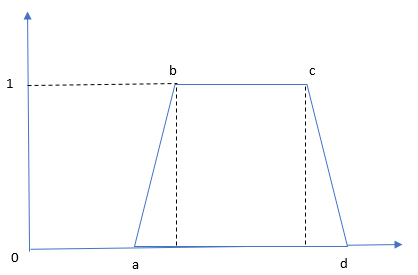

In [19]:
Image(filename = PATH + "grafik trapesium.png")

Adapun rumus representasi kurvanya adalah 

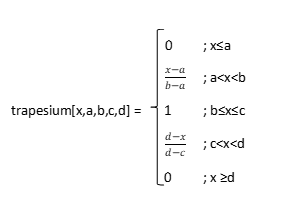

In [21]:
Image(filename = PATH + "rumus trapesium.png")

**Keterangan**
    
        a: nilai domain terkecil yang memiliki nilai derajat keanggotaan sama dengan nol
        b: nilai domain yang memiliki nilai derajat keanggotaan sama dengan satu
        c: nilai domain yang memiliki nilai derajat keanggotaan sama dengan satu
        d: nilai domain terbesar yang memiliki nilai derajat keanggotaan sama dengan nol

**Fungsi Keanggotaan Variabel Input Konsentrasi Gas**

Pada variabel input konsentrasi gas, terbagi menjadi tiga kategori. Kategori tersebut adalah:

    Rendah : 1-50%
    Sedang : 25-75%
    Tinggi : 50-100%

Fungsi yang akan digunakan adalah **fuzz.trimf** karena kurva fungsi yang akan digunakan adalah kurva fungsi segitiga. Untuk mendefinisikan domainnya, gunakan **variabel.universe** dan selanjutnya masukkan batas-batasnya (domain), dengan format **[batas awal, titik puncak, batas akhir)**. Kode programnya adalah:
**variabel[nama himpunan fuzzy] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])**

In [6]:
Konsentrasi_gas['Rendah'] = fuzz.trimf(Konsentrasi_gas.universe,[1, 25, 50])
Konsentrasi_gas['Sedang'] = fuzz.trimf(Konsentrasi_gas.universe,[25, 50, 75])
Konsentrasi_gas['Tinggi'] = fuzz.trimf(Konsentrasi_gas.universe,[50, 75, 100])

Adapun representasi fungsi dari variabel konsentrasi gas tersebut adalah

**Konsentrasi Gas Rendah **

Kadar konsentrasi gas pada level ini dimulai dari 1 hingga 50 persen 

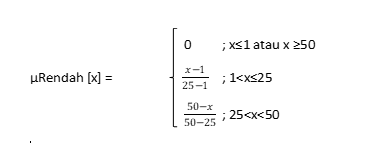

In [22]:
Image(filename = PATH + "konsentrasi gas rendah.png")

**Konsentrasi Gas Sedang**

Kadar konsentrasi gas pada level ini dimulai dari 25 hingga 75 persen 

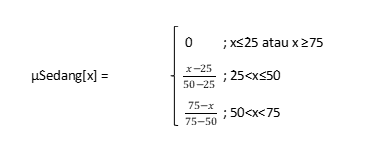

In [23]:
Image(filename = PATH + "konsentrasi gas sedang.png")

**Konsentrasi Gas Tinggi**

Kadar konsentrasi gas pada level ini dimulai dari 50 hingga 100 persen

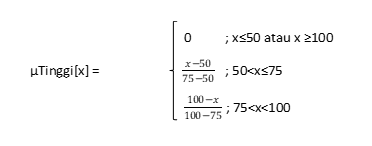

In [24]:
Image(filename = PATH + "konsentrasi gas tinggi.png")

Dari fungsi persamaan tersebut dapat dibentuk beberapa fungsi grafik segitiga. Adapun grafik fungsi dari konsentrasi gas adalah

C:\Users\Putri\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


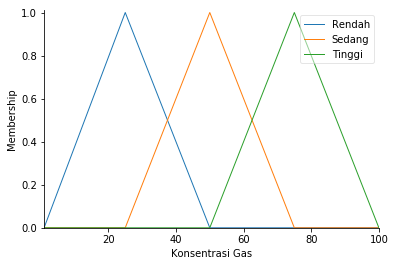

In [7]:
Konsentrasi_gas.view()

Sedangkan Plot terpisah untuk masing-masing variabel konsentrasi gas adalah

In [9]:
#untuk plot terpisah
konsentrasi_rendah = fuzz.trimf(konsentrasi_gas1, [1, 25, 50])
konsentrasi_sedang = fuzz.trimf(konsentrasi_gas1, [25, 50, 75])
konsentrasi_tinggi = fuzz.trimf(konsentrasi_gas1, [50, 75, 100])

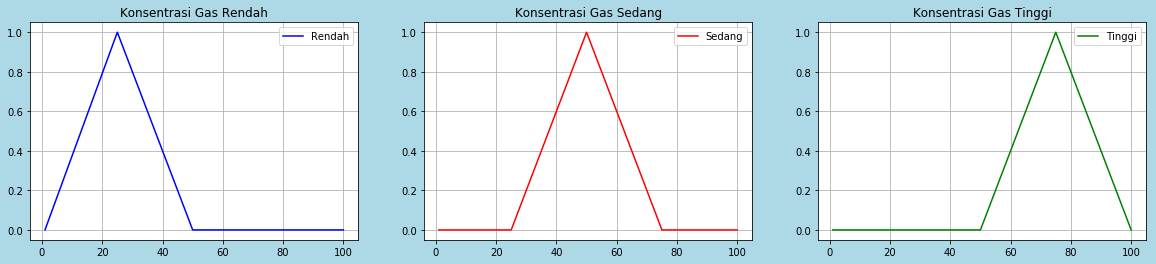

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,facecolor='lightblue', figsize=(20, 4))

ax0.plot(konsentrasi_gas1,konsentrasi_rendah, 'b', linewidth=1.5, label='Rendah')
ax1.plot(konsentrasi_gas1,konsentrasi_sedang, 'r', linewidth=1.5, label='Sedang')
ax2.plot(konsentrasi_gas1,konsentrasi_tinggi, 'g', linewidth=1.5, label='Tinggi')

ax0.set_title('Konsentrasi Gas Rendah')
ax1.set_title('Konsentrasi Gas Sedang')
ax2.set_title('Konsentrasi Gas Tinggi')

ax0.grid()
ax1.grid()
ax2.grid()

ax0.legend()
ax1.legend()
ax2.legend()

Konsentrasi gas **rendah** memiliki range antara 1 hingga 50 persen dengan titik 25 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

Konsentrasi gas **sedang** memiliki range antara 25 hingga 75 persen dengan titik 50 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

Konsentrasi gas **tinggi** memiliki range antara 50 hingga 100 persen dengan titik 75 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

<space>

**Fungsi Keanggotaan Variabel Input Tingkat Panas Ruangan**

Pada variabel tingkat panas ruangan, terbagi menjadi tiga kategori. Kategori tersebut adalah:

    Rendah : 30-50 derajat Celcius
    Sedang : 40-60 derajat Celcius
    Tinggi : 50-70 derajat Celcius

Ada dua fungsi yang akan digunakan. Kedua fungsi tersebut adalah **fuzz.trimf** karena kurva fungsi yang akan digunakan adalah kurva fungsi segitiga dan juga **fuzz.trapmf** karena ada salah satu fungsi yang menggunakan kurva fungsi trapesium.

Untuk mendefinisikan domainnya, gunakan **variabel.universe** yang selanjutnya masukkan batas-batasnya (domain), dengan format **[batas awal, titik puncak, batas akhir)**. Kode programnya adalah:
**variabel[nama himpunan fuzzy] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])** untuk fungsi segitiga. 

Sedangkan fungsi trapesium kode programnya adalah **variabel[nama himpunan fuzzy] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak1, titik puncak2, batas akhir])** 

In [11]:
Panas_ruangan['Rendah'] = fuzz.trimf(Panas_ruangan.universe,[30, 40, 50])
Panas_ruangan['Sedang'] = fuzz.trimf(Panas_ruangan.universe,[40, 50, 60])
Panas_ruangan['Tinggi'] = fuzz.trapmf(Panas_ruangan.universe,[50, 60, 70, 80])

Adapun representasi fungsi dari variabel tingkat panas ruangan adalah

**Tingkat Panas Ruangan Rendah**

Tingkat panas ruangan dianggap rendah dimualai dari rentang 30 derajat Celcius hingga 50 derajat Celcius

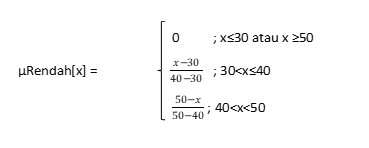

In [25]:
Image(filename = PATH + "suhu rendah.png")

**Tingkat Panas Ruangan Sedang**

Tingkat panas ruangan dianggap sedang dimualai dari rentang 40 derajat Celcius hingga 60 derajat Celcius

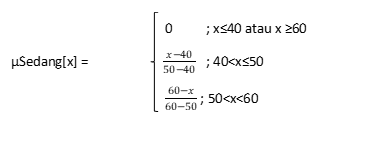

In [28]:
Image(filename = PATH + "suhu sedang.png")

**Tingkat Panas Ruangan Tinggi**

Tingkat panas ruangan dianggap tinggi dimualai dari rentang 50 derajat Celcius hingga 70 derajat Celcius keatas

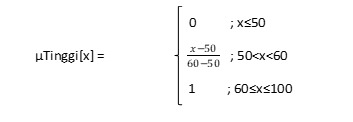

In [27]:
Image(filename = PATH + "suhu tinggi.png")

Dari fungsi persamaan tersebut dapat dibentuk dua fungsi grafik segitiga dan satu fungsi grafik trapesium. Adapun grafik fungsi dari tingkat panas ruangan adalah

C:\Users\Putri\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


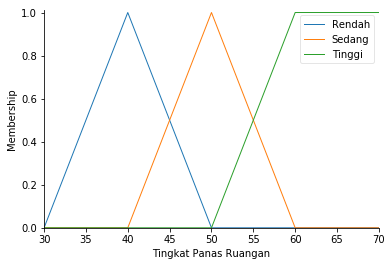

In [12]:
Panas_ruangan.view()

Plot terpisah untuk masing-masing variabel input tingkat panas ruangan adalah

In [13]:
#untuk plot terpisah
panas_ruangan_rendah = fuzz.trimf(panas_ruangan1, [30, 40, 50])
panas_ruangan_sedang = fuzz.trimf(panas_ruangan1, [40, 50, 60])
panas_ruangan_tinggi = fuzz.trapmf(panas_ruangan1, [50, 60, 70, 80])

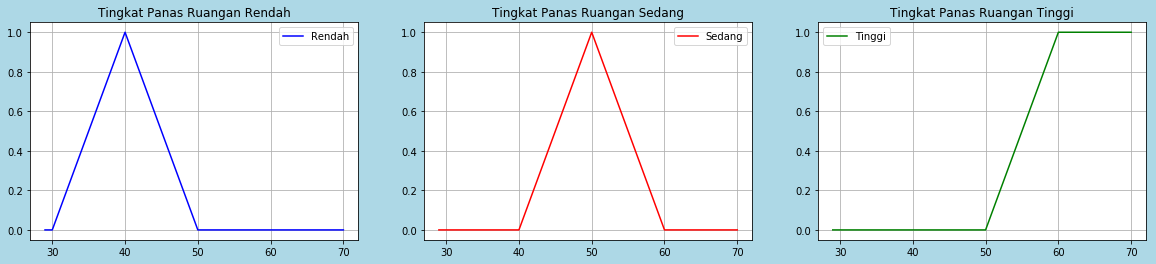

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,facecolor='lightblue', figsize=(20, 4))

ax0.plot(panas_ruangan1,panas_ruangan_rendah, 'b', linewidth=1.5, label='Rendah')
ax1.plot(panas_ruangan1,panas_ruangan_sedang, 'r', linewidth=1.5, label='Sedang')
ax2.plot(panas_ruangan1,panas_ruangan_tinggi, 'g', linewidth=1.5, label='Tinggi')

ax0.set_title('Tingkat Panas Ruangan Rendah')
ax1.set_title('Tingkat Panas Ruangan Sedang')
ax2.set_title('Tingkat Panas Ruangan Tinggi')

ax0.grid()
ax1.grid()
ax2.grid()

ax0.legend()
ax1.legend()
ax2.legend()

Tingkat panas ruangan **rendah** memiliki range antara 30 hingga 50 derajat Celcius dengan titik 40 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

Tingkat panas ruangan **sedang** memiliki range antara 40 hingga 60 derajat Celcius dengan titik 50 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

Tingkat panas ruangan **tinggi** memiliki range antara 50 hingga 70 derajat Celcius dengan titik 60 hingga 60 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

<space>

**Fungsi Keanggotaan Variabel Output Kecepatan Putaran Fan**

Pada variabel output putaran fan, terbagi menjadi tiga kategori. Kategori tersebut adalah:

    Lambat  : 1-50
    Sedang  : 25-75
    Cepat   : 75-100

Ada dua fungsi yang akan digunakan. Kedua fungsi tersebut adalah **fuzz.trimf** karena kurva fungsi yang akan digunakan adalah kurva fungsi segitiga dan juga **fuzz.trapmf** karena ada salah satu fungsi yang menggunakan kurva fungsi trapesium.

Untuk mendefinisikan domainnya, gunakan **variabel.universe** yang selanjutnya masukkan batas-batasnya (domain), dengan format **[batas awal, titik puncak, batas akhir)**. Kode programnya adalah:
**variabel[nama himpunan fuzzy] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])** untuk fungsi segitiga. 

Sedangkan fungsi trapesium kode programnya adalah **variabel[nama himpunan fuzzy] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak1, titik puncak2, batas akhir])** 

In [15]:
Putaran_fan['Lambat'] = fuzz.trimf(Putaran_fan.universe,[1, 25, 50])
Putaran_fan['Sedang'] = fuzz.trimf(Putaran_fan.universe,[25, 50, 75])
Putaran_fan['Cepat'] = fuzz.trapmf(Putaran_fan.universe,[50, 75, 100, 125])

Adapun representasi fungsi dari variabel kecepatan putaran fan adalah

**Putaran Fan Lambat**

Kecepatan putaran fan lambat dimualai dari rentang nilai 1 hingga nilai 50

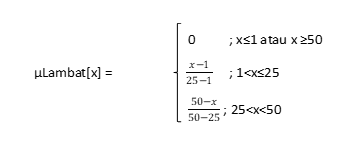

In [32]:
Image(filename = PATH + "putaran lambat.png")

**Putaran Fan Sedang **

Kecepatan  putaran fan sedang dimualai dari rentang nilai 25 hingga nilai 75

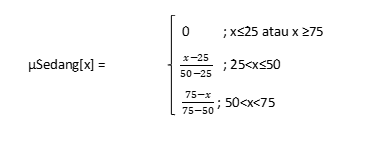

In [33]:
Image(filename = PATH + "putaran sedang.png")

**Putaran Fan Cepat**
<space>Kecepatan  putaran fan cepat dimualai dari rentang nilai 50 hingga nilai 100

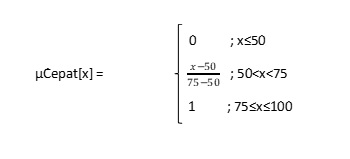

In [34]:
Image(filename = PATH + "putaran cepat.png")

Dari fungsi persamaan tersebut dapat dibentuk dua fungsi grafik segitiga dan satu fungsi grafik trapesium. Adapun grafik fungsi dari kecepatan putaran fan adalah

C:\Users\Putri\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


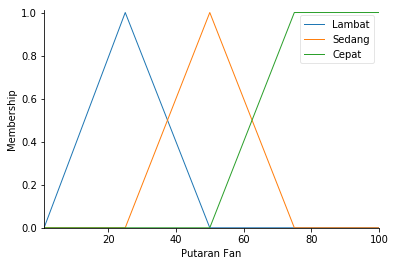

In [16]:
Putaran_fan.view()

Plot terpisah untuk masing-masing variabel output kecepatan putaran fan adalah

In [17]:
Lambat = fuzz.trimf(putaran_fan1, [1, 25, 50])
Sedang = fuzz.trimf(putaran_fan1, [25, 50, 75])
Cepat = fuzz.trapmf(putaran_fan1, [50, 75, 100, 125])

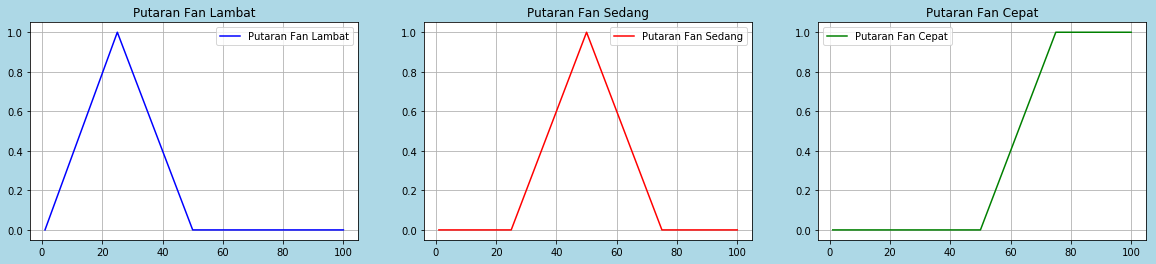

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, facecolor='lightblue',figsize=(20, 4))

ax0.plot(putaran_fan1,Lambat, 'b', linewidth=1.5, label='Putaran Fan Lambat')
ax1.plot(putaran_fan1,Sedang, 'r', linewidth=1.5, label='Putaran Fan Sedang')
ax2.plot(putaran_fan1,Cepat, 'g', linewidth=1.5, label='Putaran Fan Cepat')

ax0.set_title('Putaran Fan Lambat')
ax1.set_title('Putaran Fan Sedang')
ax2.set_title('Putaran Fan Cepat')

ax0.grid()
ax1.grid()
ax2.grid()

ax0.legend()
ax1.legend()
ax2.legend()

Putaran fan **lambat** memiliki nilai range antara 1 hingga 50 dengan titik 25 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

Putaran fan **sedang** memiliki range antara 25 hingga 75 derajat Celcius dengan titik 50 sebagai titik yang memiliki nilai fuzzy sama dengan satu.

Putaran fan **cepat** memiliki range antara 50 hingga 100 derajat Celcius dengan titik 75 hingga 100 sebagai titik yang memiliki nilai fuzzy sama dengan satu. 

**RULE BASE**

**5. Menentukan Rule Base**

Adapun rule base yang dibentuk untuk membangun sistem ini adalah:

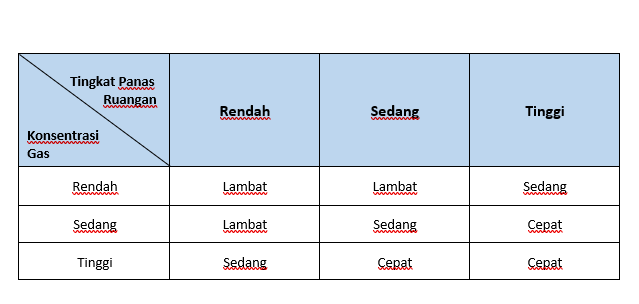

In [36]:
Image(filename = PATH + "rulebase.png")

Adapun rulebase yang didapatkan berdasarkan hasil tabel tersebut adalah 

1. Jika **konsentrasi gas rendah** dan **tingkat panas ruangan rendah** maka kecepatan putaran fan adalah **lambat**

2. Jika **konsentrasi gas rendah** dan **tingkat panas ruangan sedang** maka kecepatan putaran fan adalah **lambat**

3. Jika **konsentrasi gas rendah** dan **tingkat panas ruangan tinggi** maka kecepatan putaran fan adalah **sedang**

4. Jika **konsentrasi gas sedang** dan **tingkat panas ruangan rendah** maka kecepatan putaran fan adalah **lambat**

5. Jika **konsentrasi gas sedang** dan **tingkat panas ruangan sedang** maka kecepatan putaran fan adalah **sedang**

6. Jika **konsentrasi gas sedang** dan **tingkat panas ruangan tinggi** maka kecepatan putaran fan adalah **cepat**

7. Jika **konsentrasi gas tinggi** dan **tingkat panas ruangan rendah** maka kecepatan putaran fan adalah **sedang**

8. Jika **konsentrasi gas tinggi** dan **tingkat panas ruangan sedang** maka kecepatan putaran fan adalah **cepat**

9. Jika **konsentrasi gas tinggi** dan **tingkat panas ruangan tinggi** maka kecepatan putaran fan adalah **cepat**

Jika diterjemahkan dalam program phyton, maka

In [19]:
rule1 = ctrl.Rule(Konsentrasi_gas['Rendah'] & Panas_ruangan['Rendah'], Putaran_fan['Lambat'])
rule2 = ctrl.Rule(Konsentrasi_gas['Rendah'] & Panas_ruangan['Sedang'], Putaran_fan['Lambat'])
rule3 = ctrl.Rule(Konsentrasi_gas['Rendah'] & Panas_ruangan['Tinggi'], Putaran_fan['Sedang'])
rule4 = ctrl.Rule(Konsentrasi_gas['Sedang'] & Panas_ruangan['Rendah'], Putaran_fan['Lambat'])
rule5 = ctrl.Rule(Konsentrasi_gas['Sedang'] & Panas_ruangan['Sedang'], Putaran_fan['Sedang'])
rule6 = ctrl.Rule(Konsentrasi_gas['Sedang'] & Panas_ruangan['Tinggi'], Putaran_fan['Cepat'])
rule7 = ctrl.Rule(Konsentrasi_gas['Tinggi'] & Panas_ruangan['Rendah'], Putaran_fan['Sedang'])
rule8 = ctrl.Rule(Konsentrasi_gas['Tinggi'] & Panas_ruangan['Sedang'], Putaran_fan['Cepat'])
rule9 = ctrl.Rule(Konsentrasi_gas['Tinggi'] & Panas_ruangan['Tinggi'], Putaran_fan['Cepat'])

**MEKANISME INFERENSI DAN DEFUZZYFIKASI**

**Inferencing**

Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Berdasarkan jumlah input dari variabel konsentrasi yang berjumlah 3 dan dari variabel tingkat panas ruangan yang berjumlah 3, maka rule yang dihasilkan berjumlah 3 x 3 = 9 rule.
Nantinya setiap rule akan memiliki nilai yang berbeda-beda sesuai dengan fungsi yang telah dibuat. Adapun aturan fuzzy yang telah dibuat adalah:

1. IF **konsentrasi Gas Rendah** & **Tingkat Panas Ruangan Rendah** THEN Putaran Fan adalah **lambat**

2. IF **konsentrasi Gas Rendah** & **Tingkat Panas Ruangan Sedang** THEN Putaran Fan adalah **lambat**

3. IF **konsentrasi Gas Rendah** & **Tingkat Panas Ruangan Tinggi** THEN Putaran Fan adalah **sedang**

4. IF **konsentrasi Gas Sedang** & **Tingkat Panas Ruangan Rendah** THEN Putaran Fan adalah **lambat**

5. IF **konsentrasi Gas Sedang** & **Tingkat Panas Ruangan Sedang** THEN Putaran Fan adalah **sedang**

6. IF **konsentrasi Gas Sedang** & **Tingkat Panas Ruangan Tinggi** THEN Putaran Fan adalah **cepat**

7. IF **konsentrasi Gas Tinggi** & **Tingkat Panas Ruangan Rendah** THEN Putaran Fan adalah **sedang**

8. IF **konsentrasi Gas Tinggi** & **Tingkat Panas Ruangan Sedang** THEN Putaran Fan adalah **cepat**

9. IF **konsentrasi Gas Tinggi** & **Tingkat Panas Ruangan Tinggi** THEN Putaran Fan adalah **cepat**

<space>

**6. Menggabungan Semua Rule untuk Dijadikan Sebagai Control System**

In [20]:
kecepatan_fan_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

Kode program **ctrl.ControlSystem** digunakan untuk menggabungkan beberapa rule yang ada dan akan secara otomatis mengimplikasi rule-rule yang ada

**7. Melakukan Simulasi Sistem**

**Jika terdapat kasus dimana konsentrasi gas pada suatu ruangan bernilai 60% dan suhu pada ruangan pada ruangan tersebut adalah sebesar 50 derajat Celcius. Maka berapakah nilai kecepatan putaran fan pada sistem? Apakah lambat,sedang ataukah cepat?**

Jika perhitungan dilakukan menggunakan komputasi pada phyton, maka langkah-langkahnya adalah

In [21]:
kecepatan_putaran_fan= ctrl.ControlSystemSimulation(kecepatan_fan_ctrl)

Kode program **ControlSystemSimulation** digunakan untuk melakukan simulasi berdasarkan rule yang telah dibuat sebelumnya pada control system

In [22]:
kecepatan_putaran_fan.input['Konsentrasi Gas'] = 60
kecepatan_putaran_fan.input['Tingkat Panas Ruangan'] = 50

Selanjutnya adalah menginput konsentrasi gas dan juga tingkat panas ruangan. Berdasarkan contoh kasus, konsentrasi gas bernilai 60% dan tingkat panas ruangannya adalah 50 derajat Celcius.

In [23]:
Hasil = kecepatan_putaran_fan.compute()

Proses komputasi pun dilakukan berdasarkan **input** yang telah dimasukkan

Berdasarkan hasil komputasi, maka nilai untuk **output** kecepatan putaran fan adalah

In [24]:
Hasil = kecepatan_putaran_fan.output['Putaran Fan']
print("Nilai kecepatan putaran berdasarkan hasil komputasi = %.9f " % Hasil)

Nilai kecepatan putaran berdasarkan hasil komputasi = 62.676767677 


Adapun letaknya pada grafik output kecepatan putaran fan adalah

C:\Users\Putri\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


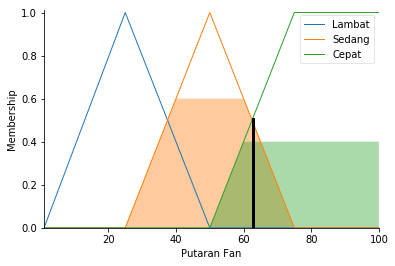

In [25]:
Putaran_fan.view(sim=kecepatan_putaran_fan)

**Nilai yang didapat berdasarkan hasil komputasi adalah "62,676767677" dan kecepatan putaran fan adalah "cepat"**

<space>

# **HITUNG MANUAL**

Jika perhitungan dilakukan secara manual, maka langkah-langkahnya adalah

Diketahui **Konsentrasi gas = 60%** dan **Tingkat panas ruangan = 50 derajat Celcius**

**-- Mencari Daerah Derajat Keanggotaan pada Fungsi Berdasarkan Input**

**1.Konsentrasi gas = 60%**

Input Konsentrasi gas dan juga rangenya adalah 

        Rendah : 1-50%
        Sedang : 25-75%
        Tinggi : 50-100%

Berdasarkan range input, konsentrasi gas = 60% masuk ke dalam range variabel **sedang** dan juga range variabel **tinggi**

**- Range Sedang**

Adapun fungsi untuk range **sedang** adalah

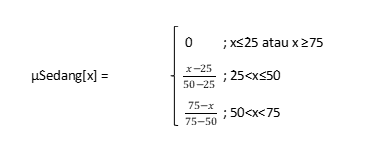

In [39]:
Image(filename = PATH + "konsentrasi gas sedang.png")

Sedangkan fungsi yang memenuhi adalah

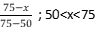

In [38]:
Image(filename = PATH + "case konsentrasi gas sedang.png")

Sehingga,

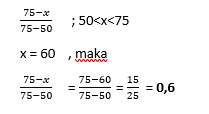

In [40]:
Image(filename = PATH + "case fungsi gas sedang.png")

Jadi nilai **konsentrasi gas** pada range **sedang** adalah **0,6**


<space>

**- Range Tinggi**

Adapun fungsi untuk range **tinggi** adalah

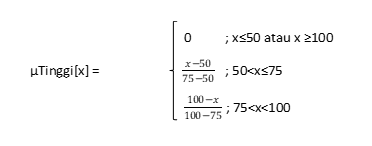

In [41]:
Image(filename = PATH + "konsentrasi gas tinggi.png")

Sedangkan fungsi yang memenuhi adalah

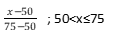

In [42]:
Image(filename = PATH + "case konsentrasi gas tinggi.png")

Sehingga,

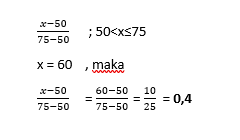

In [45]:
Image(filename = PATH + "case fungsi  gas tinggi.png")

Jadi nilai **konsentrasi gas** pada range **tinggi** adalah **0,4**

<space>

**2. Tingkat panas ruangan = 50 derajat Celcius**

Input Tingkat panas ruangan dan juga rangenya adalah

        Rendah : 30-50 derajat Celcius
        Sedang : 40-60 derajat Celcius
        Tinggi : 50-70 derajat Celcius 

Berdasarkan range input, Tingkat panas ruangan = 50 derajat Celcius masuk ke dalam range variabel **sedang**

**- Range Sedang**

Adapun fungsi untuk range **sedang** adalah

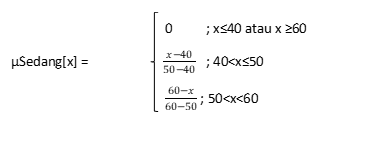

In [47]:
Image(filename = PATH + "suhu sedang.png")

Sedangkan fungsi yang memenuhi adalah

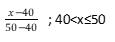

In [48]:
Image(filename = PATH + "case suhu sedang.png")

Sehingga,

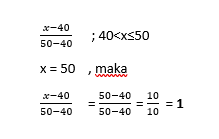

In [49]:
Image(filename = PATH + "case fungsi suhu sedang.png")

Jadi nilai **Tingkat panas ruangan** pada range **sedang** adalah **1**

**-- Melakukan Evaluasi Rule**

>Evaluasi rule dilakukan dengan fungsi implikasi **MIN**, dimana nilai input yang diambil adalah nilai input yang terkecil. Berdasarkan input, terdapat **2 Rule yang Aktif**, yaitu:

>**_Rule 5_** : IF **konsentrasi Gas Sedang** & **Tingkat Panas Ruangan Sedang** THEN Putaran Fan adalah **sedang**

>Nilai masing-masing input adalah
         
         Konsentrasi Gas Sedang = 0,6
         Tingkat Panas Ruangan Sedang = 1

>Berdasarkan fungsi implikasi MIN, maka nilai yang diambil untuk Putaran Fan **sedang** adalah `0,6`

>**_Rule 8_** : IF **konsentrasi Gas Tinggi** & **Tingkat Panas Ruangan Sedang** THEN Putaran Fan adalah **cepat**

>Nilai masing-masing input adalah
        
        Konsentrasi Gas Tinggi = 0,4
        Tingkat Panas Ruangan Sedang = 1

>Berdasarkan fungsi implikasi MIN,maka nilai yang diambil untuk Putaran Fan **cepat** adalah `0,4`

**-- Menentukan Daerah yang Sesuai Berdasarkan Gabungan Hasil Evaluasi Rule**

>Berdasarkan hasil evaluasi rule, maka daerah yang sesuai dan akan dihitung adalah daerah fungsi **sedang** yang berbentuk segitiga dan daerah  fungsi **cepat** yang berbentuk setengah trapesium pada grafik output Putaran Fan. Pada daerah fungsi **sedang**, nilai fungsi keanggotaan berada pada titik `0,6`. Sedangkan pada daerah  fungsi **cepat**,nilai fungsi keanggotaan berada pada titik `0,4`. Jika satu daerah memiliki nilai fungsi keanggotaan lebih dari satu, maka nilai yang diambil adalah nilai yang terbesar. Hal ini dikarenakan fungsi implikasi **MAX** digunakan untuk menggabungkan semua rule yang aktif.

>Gambar arsirannya adalah:

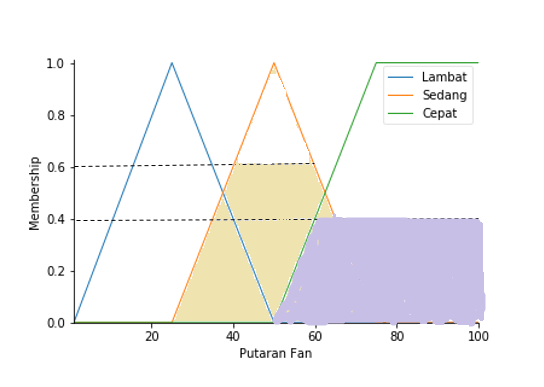

In [56]:
Image(filename = PATH + "arsiran.png")

**-- Mencari Nilai Kecepatan Putaran Fan Berdasarkan Daerah yang Telah Ditentukan**

>Berdasarkan daerah yang dairsir, dapat dilihat bahwa terdapat **empat** pembagian daerah. Nantinya daerah tersebut akan dicari luas dan titik tengahnya. Kemudian luas daerah dan titik tengah tersebut akan digunakan untuk mencari nilai output putaran fan. Adapun rumusnya adalah : 


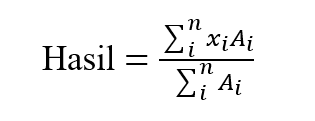

In [50]:
Image(filename = PATH + "persamaan hasil.png")

>Keterangan:
    
        x : nilai tengah
        A : luas daerah

>Berdasarkan hasil arsiran, berikut ini merupakan daerah yang akan dicari luasnya dan nilai tengahnya beserta pembagian daerahnya

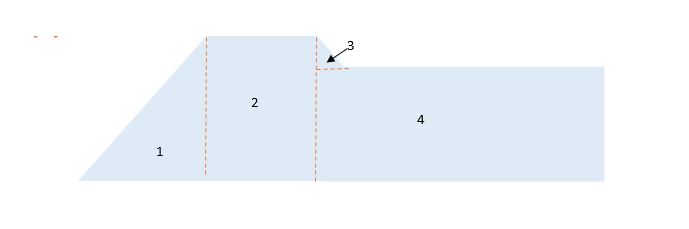

In [58]:
Image(filename = PATH + "hasil arsiran.png")

>Adapun masing-masing nilai luas daerah dan titik tengah dari grafik yang sudah diarsir adalah:


>**- Luas daerah**

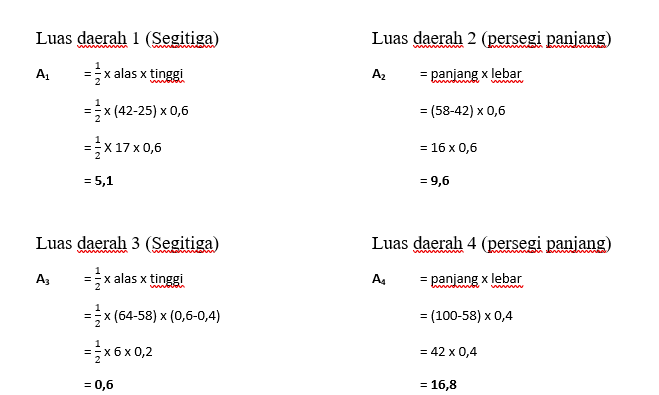

In [52]:
Image(filename = PATH + "luas daerah.png")

>**- Titik tengah**

>Berdasarkan luas daerah dan titik tengah tersebut, maka hasilnya adalah

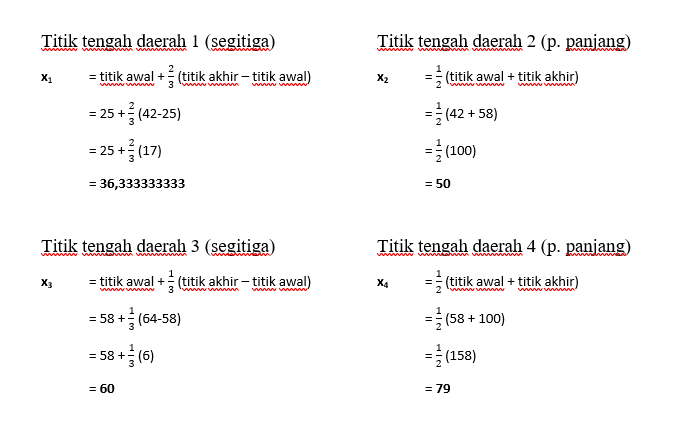

In [53]:
Image(filename = PATH + "titik tengah.png")

Berdasarkan hasil perhitungan manual, nilai kecepatan putaran fan adalah **63,193093** dan jenis kecepatan putaran fan adalah **cepat**.

<space>

**Perbandingan Hasil Antara Hasil Komputasi dan Hasil Hitung Manual**

Hal ini dilakukan untuk melihat seberapa besar akurasi dari hasil komputasi terhadap hasil perhitungan manual dan seberapa besar nilai eror antara hasil komputasi dan hitung manual.

In [49]:
Hasil_Manual = 63.193093
Nilai_Akurasi = Hasil*100/Hasil_Manual
Nilai_Error = 100-Nilai_Akurasi
print ("Akurasi = %.9f" % Nilai_Akurasi + " %")
print ("Error = %.9f" % Nilai_Error  + " %")

Akurasi = 99.182940257 %
Error = 0.817059743 %


**ANALISA**

Nilai kecepatan putaran fan berdasarkan perhitungan hasil komputasi adalah **62,676767677**, sedangkan nilai kecepatan putaran fan berdasarkan perhitungan manual adalah **63,193093**. Dengan demikian, dapat dismpulkan bahwa **output kecepatan fan** berdasarkan input yang dimasukkan adalah **cepat**. Adapun akurasi antara kedua cara perhitungan tesebut adalah **99.182940257 %** dan errornya adalah  **0.817059743 %**. Error tersebut disebabkan oleh pengambilan titik untuk menghitung luas daerah pada saat hitung manual kurang tepat. Sehingga titik yang diambil menjadi sedikit kurang akurat yang menyebabkan terdapatnya selisih antara hasil perhitungan komputasi dan hasil perhitungan manual.

<space>

**REFERENSI**

https://jurnaleeccis.ub.ac.id/index.php/eeccis/article/view/402

http://103.193.19.206/index.php/SNTIKI/article/view/2959